In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc

In [59]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [60]:
df = pd.read_csv('X_train.csv')
df = pd.get_dummies(df, columns=["Provider Type"])
#df

In [61]:
train_x = df.iloc[:,1:].values
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]

In [62]:
from rbm import RBM
model = RBM(train_x.shape[1], 10, visible_unit_type='gauss', main_dir='./', model_name='rbm_model.ckpt',
                 gibbs_sampling_steps=4, learning_rate=0.001, momentum = 0.95, batch_size=512, num_epochs=10, verbose=1)

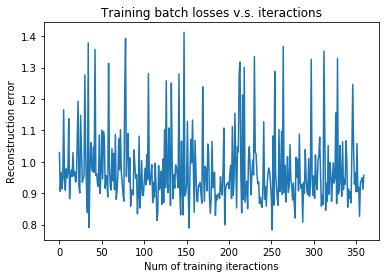

In [63]:
model.fit(train_x)

In [64]:
free_energy = model.getFreeEnergy(train_x).reshape(-1)

INFO:tensorflow:Restoring parameters from ./rbm_model.ckpt


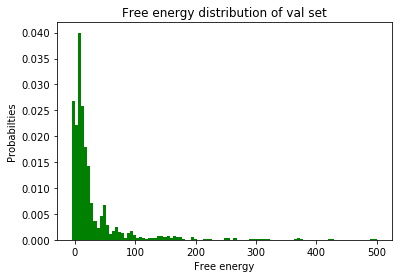

In [65]:
plt.title('Free energy distribution of val set')
plt.xlabel('Free energy')
plt.ylabel('Probabilties')
plt.hist(free_energy[free_energy < 500], bins = 100, color='green', normed=1.0)
plt.show()

In [66]:
import pandas as pd
output = pd.DataFrame()
output['Doctor Identifier'] = df['Doctor Identifier']
output['Risk'] = free_energy
output.to_csv("boltzmann.csv", index=False)